In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Adjust this if needed
DATA_DIR = Path("../cpp")

def load_sequence(csv_path):
    df = pd.read_csv(csv_path)
    return df["x"].values


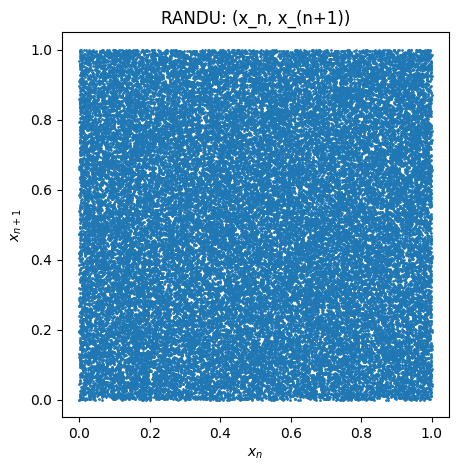

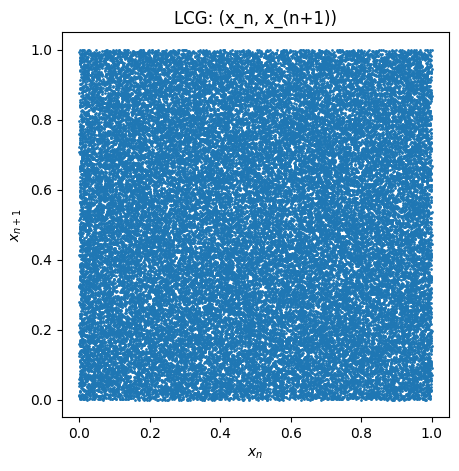

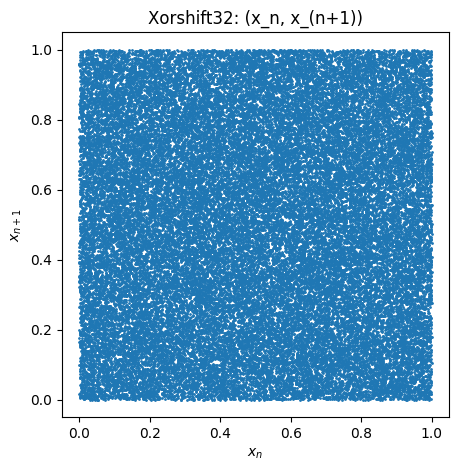

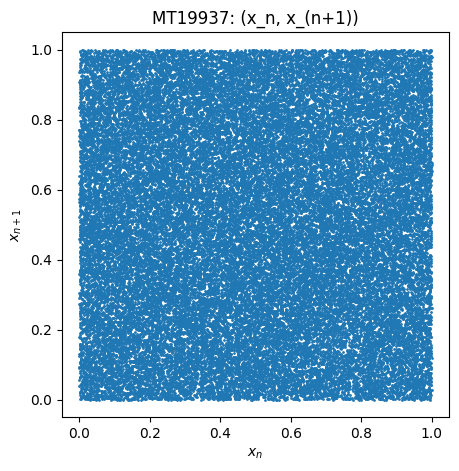

In [3]:
def plot_2d_pairs(x, title, max_points=50000):
    n = min(max_points, len(x) - 1)
    x0 = x[:n]
    x1 = x[1:n+1]

    plt.figure(figsize=(5, 5))
    plt.scatter(x0, x1, s=1)
    plt.xlabel("$x_n$")
    plt.ylabel("$x_{n+1}$")
    plt.title(title)
    plt.show()

generators = {
    "RANDU": DATA_DIR / "randu.csv",
    "LCG": DATA_DIR / "lcg.csv",
    "Xorshift32": DATA_DIR / "xorshift32.csv",
    "MT19937": DATA_DIR / "mt19937.csv",
}

for name, path in generators.items():
    seq = load_sequence(path)
    plot_2d_pairs(seq, f"{name}: (x_n, x_(n+1))")


In [8]:
import plotly.graph_objects as go
import numpy as np

def plot3d_interactive(x, title):
    n = min(10000, len(x)-2)
    x0 = x[:n]
    x1 = x[1:n+1]
    x2 = x[2:n+2]

    fig = go.Figure(data=[go.Scatter3d(
        x=x0, y=x1, z=x2,
        mode='markers',
        marker=dict(size=2)
    )])

    fig.update_layout(title=title)
    fig.show()


for name, path in generators.items():
    seq = load_sequence(path)
    plot3d_interactive(seq, f"{name}: (x_n, x_(n+1), x_(n+2))")
    